by Keshav Ramesh - South Windsor High School, South Windsor, Connecticut (USA)

ABSTRACT

In this paper I use computational statistical techniques within the Python programming language to analyze the County dataset, which provided 27 predictor variables for each county in the United States. I implement data visualization and statistical modeling techniques from the importation of the NumPy, SciKit-Learn, Matplotlib, Seaborn, and Statsmodels data science and machine learning libraries/packages, and observe that the socioeconomic factors that were the greatest predictors of counties voting either Democrat or Republican in the 2016 presidential election are the rate of Severe Housing Problems, followed far behind by the rate of Poor Health. I suggest that the two issues Democrats and Republicans focus on the most for 2020 and beyond (in order to win the presidential election, at least) would be residential infrastructure and healthcare, which are already very dominant within candidates' policy proposals and are consistent with many individuals' assumptions about which issues are most associated/decisive when it concerns voting for either Democrat or Republican in a presidential election. Additionally, I find statistically significant differences between three predictor variables (unemployment, median household income, and high school graduation rate) and election results by county in 2016, and observe through the creation of a mosaic plot that population brackets consisting of counties with higher populations have a higher proportion of Democrat-voting counties, while population brackets consisting of counties with lower populations have a higher proportion of Republican-voting counties, which was modeled through a mosaic plot. I construct three 3-variable scatterplots (two continuous - rate of severe housing problems and high school graduation rate, 1 categorical - Democrat/Republican election results in 2016) and find a weak, negative correlation between the two continuous variables in all three plots, as well as identified clusters and patterns regarding the categorical variable. I use this three-variable method for my boxplots and bar graphs for identifying quartiles of income inequality and quintiles of food insecurity as they concerned the relationship between Democrat/Republican election results in 2016 and median household income. Furthermore, I create three models demonstrating the statistically significant association between the percentage of the county that is rural, the percentage that is over the age of 65, and the county's outcome in the 2016 presidential election. Lastly, I prove that based on the information gathered from the decision tree and the "variable importance" process, one can conclude that the most important predictor (x) variable for determining whether a county would vote Democrat or Republican in the 2016 presidential election is the rate of Severe Housing Problems, whose entropy dwarfs the rest of the potential candidates for predictor (x) variables. It is followed by the rate of Poor Health and Population at much smaller entropy values, with three others close behind and the rest of the potential predictor (x) variables having a relatively minor effect on county election choices.

# Introduction

In this presentation, we will be using a County Dataset (countydata.csv) for the purpose of analyzing the majority of Democrat or Republican votes in the 2016 presidential election by county, which is a two-level categorical y-variable. In the 2016 presidential election, the Democratic Party nominee was Hillary Clinton and the Republican Party nominee was Donald Trump.

While the former won the popular vote, the latter won the Electoral College (and therefore the presidency). The purpose of this presentation is to investigate whether socioeconomic trends, patterns, etc. contribute to counties either leaning/voting Democrat or Republican in the 2016 presidential election, and how strong the relationship between these predictor variables and the y-variable (Election Results in 2016) is through various methods.

## Goals for this Paper

Goals for this paper:

 - Learn about which socioeconomic factors are correlated with a county voting Democratic or Republican.
 - Apply data visualization techniques and statistical concepts to understanding the relationship between continuous and categorical variables in this dataset.
 - Extrapolate based on trends and patterns that are observed when analyzing and maninpulating data so that predictions can be made about future elections, such as in 2020, between the Democratic nominee (Joe Biden) and the Republican nominee (Donald Trump).

## Questions About the Dataset

Some questions I had about the dataset in terms of the y-variable I chose (Election Results in 2016, Democrat or Republican) included:

 - Which socioeconomic factors are strongly correlated with whether a county voted Democratic or Republican?
 - Is there a statistically significant difference in predictor (x) variables such as unemployment, median household income, high school graduation rate, etc. between counties that voted Democratic and those that voted Republican?
 - Does this data help confirm many Americans' assumptions about how socioeconomic differences tend to push groups of people (in this case, counties) toward one political party or the other?

# Downloading, Reading in, and Reviewing the Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import statsmodels.api as sm
import statsmodels.formula.api as smf
import math
from statsmodels.graphics.mosaicplot import mosaic
from sklearn import tree
from sklearn.model_selection import train_test_split

In [2]:
os.chdir("/Users/keshavramesh/Downloads/Programming Languages/Python/Final Project/")
county_data = pd.read_csv("countydata.csv")
index_col = 0
print(county_data.info())
print(county_data.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2715 entries, 0 to 2714
Data columns (total 27 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Row.Label                         2715 non-null   object 
 1   Five-digit.FIPS.Code              2715 non-null   int64  
 2   State.FIPS.Code                   2715 non-null   int64  
 3   County.FIPS.Code                  2715 non-null   int64  
 4   State.Abbreviation                2715 non-null   object 
 5   CountyName                        2715 non-null   object 
 6   Poor.Health                       2715 non-null   float64
 7   Election.Results.2016             2715 non-null   object 
 8   Uninsured                         2715 non-null   float64
 9   Primary.Care.Physicians.Per.1000  2715 non-null   float64
 10  Mental.health.providers.Per.1000  2715 non-null   float64
 11  Adult.Obesity                     2715 non-null   float64
 12  Propor

# Boxplot/Violin Plot of County Election Results in 2016 over Median Household Income

Text(0.5, 0.98, 'Distribution of Election Results Over Median Household Income')

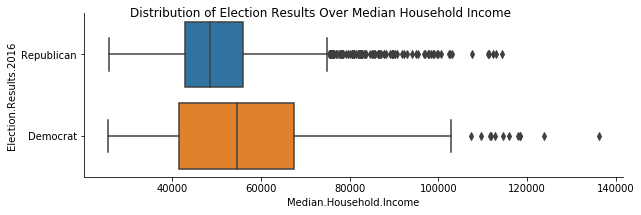

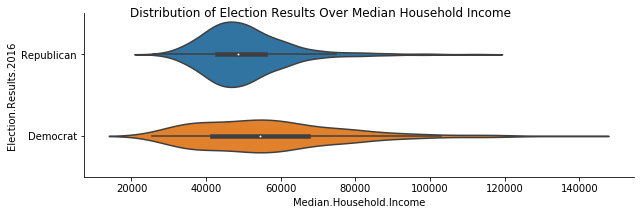

In [3]:
a1 = sns.catplot(x = "Median.Household.Income", y = "Election.Results.2016", kind = "box", data = county_data, height = 3, aspect = 3, orient = "h")
a1.fig.suptitle("Distribution of Election Results Over Median Household Income")

a2 = sns.catplot(x = "Median.Household.Income", y = "Election.Results.2016", kind = "violin", data = county_data, height = 3, aspect = 3, orient = "h")
a2.fig.suptitle("Distribution of Election Results Over Median Household Income")

# Two-Sample Hypothesis Testing

## Two-Sample Hypothesis t-Test for Equality of Means in terms of Median Household Income

Here, we calculate the average value for median household income for Democrats and Republicans across all counties, as well as the median value for the median household income for Democrats and Republicans across all counties. In both scenarios, we find that Democrats have a higher median value for median household income and average value for median household income than Republicans.

Then, we conduct a two-sample t-test for equality of means and find that the probability that the p-value is greater than t is less than 0.05, so we can reject the null hypothesis and conclude that there is a statistically significant difference between the mean value for median household income for Democrats (which was calculated as 57,005.876682) and the mean value for median household income for Republicans (which was calculated as 50,545.254297).

In [4]:
# Calculate the average value for Median Household Income for Democrats and Republicans across all counties
print(county_data.groupby("Election.Results.2016")["Median.Household.Income"].mean())

# Calculate the median value for Median Household Income for Democrats and Republicans across all counties
print(county_data.groupby("Election.Results.2016")["Median.Household.Income"].median())

# Two-Sample t-test for equality of means
x1 = sm.stats.DescrStatsW(county_data["Median.Household.Income"].loc[county_data["Election.Results.2016"] == "Democrat"])
x2 = sm.stats.DescrStatsW(county_data["Median.Household.Income"].loc[county_data["Election.Results.2016"] == "Republican"])
comp_means = sm.stats.CompareMeans(x1, x2)
comp_means.summary(usevar = "unequal")

Election.Results.2016
Democrat      57005.876682
Republican    50545.254297
Name: Median.Household.Income, dtype: float64
Election.Results.2016
Democrat      54525.5
Republican    48581.0
Name: Median.Household.Income, dtype: float64


,coef,std err,t,P>|t|,[0.025,0.975]
subset #1,6460.6224,965.904,6.689,0.000,4562.978,8358.266


## Two-Sample Hypothesis t-Test for Equality of Means in terms of Unemployment Rate

Here, we calculate the average value for unemployment rate for Democrats and Republicans across all counties in the dataset, as well as the median value for the unemployment rate for Democrats and Republicans across all counties in the dataset. In both scenarios, we find that Democrats have a higher median value for median household income and average value for median household income than Republicans.

Then, we conduct a two-sample t-test for equality of means and find that the probability that the p-value is greater than t is less than 0.05, so we can reject the null hypothesis and conclude that there is a statistically significant difference between the mean value for unemployment rate for Democrats (which was calculated as 0.048868, or 4.8868%) and the mean value for unemployment rate for Republicans (which was calculated as 0.045555, or 4.5555%).

In [5]:
# Calculate the average value for the Unemployment Rate for Democrats and Republicans across all counties
print(county_data.groupby("Election.Results.2016")["Unemployment"].mean())

# Calculate the median value for the Unemployment Rate for Democrats and Republicans across all counties
print(county_data.groupby("Election.Results.2016")["Unemployment"].median())

# Two-Sample t-test for equality of means
x3 = sm.stats.DescrStatsW(county_data["Unemployment"].loc[county_data["Election.Results.2016"] == "Democrat"])
x4 = sm.stats.DescrStatsW(county_data["Unemployment"].loc[county_data["Election.Results.2016"] == "Republican"])
comp_means = sm.stats.CompareMeans(x3, x4)
comp_means.summary(usevar = "unequal")

Election.Results.2016
Democrat      0.048868
Republican    0.045555
Name: Unemployment, dtype: float64
Election.Results.2016
Democrat      0.0451
Republican    0.0436
Name: Unemployment, dtype: float64


,coef,std err,t,P>|t|,[0.025,0.975]
subset #1,0.0033,0.001,3.448,0.001,0.001,0.005


## Two-Sample Hypothesis t-Test for Equality of Means in terms of High School Graduation Rate

Here, we calculate the average value for high school graduation rate for Democrats and Republicans across all counties in the dataset, as well as the median value for the high school graduation rate for Democrats and Republicans across all counties in the dataset. In both scenarios, we find that Democrats have a higher median value for median household income and average value for median household income than Republicans.

Then, we conduct a two-sample t-test for equality of means and find that the probability that the p-value is greater than t is less than 0.05, so we can reject the null hypothesis and conclude that there is a statistically significant difference between the mean value for high school graduation rate for Democrats (which was calculated as 0.847371, or 84.7371%) and the mean value for high school graduation rate for Republicans (which was calculated as 0.889883, or 88.9883%).

In [6]:
# Calculate the average value for the High School Graduation Rate for Democrats and Republicans across all counties
print(county_data.groupby("Election.Results.2016")["High.School.Graduation"].mean())

# Calculate the median value for the High School Graduation Rate for Democrats and Republicans across all counties
print(county_data.groupby("Election.Results.2016")["High.School.Graduation"].median())

# Two-Sample t-test for equality of means
x5 = sm.stats.DescrStatsW(county_data["High.School.Graduation"].loc[county_data["Election.Results.2016"] == "Democrat"])
x6 = sm.stats.DescrStatsW(county_data["High.School.Graduation"].loc[county_data["Election.Results.2016"] == "Republican"])
comp_means = sm.stats.CompareMeans(x5, x6)
comp_means.summary(usevar = "unequal")

Election.Results.2016
Democrat      0.847371
Republican    0.889883
Name: High.School.Graduation, dtype: float64
Election.Results.2016
Democrat      0.8619
Republican    0.9018
Name: High.School.Graduation, dtype: float64


,coef,std err,t,P>|t|,[0.025,0.975]
subset #1,-0.0425,0.004,-10.947,0.000,-0.050,-0.035


# Box Plot and Bar Chart Distributions for Income Inequality

The below box plots and bar charts constructed measure the distribution of county Democrat/Republican election results in 2016 (categorical y-variable) over median household income (continuous x-variable) and separated by income inequality quartiles.

Observe that in both the box plot and bar chart constructed below, counties in highest quartile (Q1 or top 25%) for income inequality (meaning that they have the least income inequality) have the highest median household income out of all of the income inequality quartiles for both Democrat-voting counties and Republican-voting counties.

Additionally, observe that in both the box plot and bar chart constructed below, counties in lowest quartile (Q4 or bottom 25%) for income inequality (meaning that they have the most income inequality) have the lowest median household income out of all of the income inequality quartiles for both Democrat-voting counties and Republican-voting counties.

Text(0.5, 0.98, 'Box Plot Distribution of County Election Results Over Median Household Income and by Income Inequality Quartile')

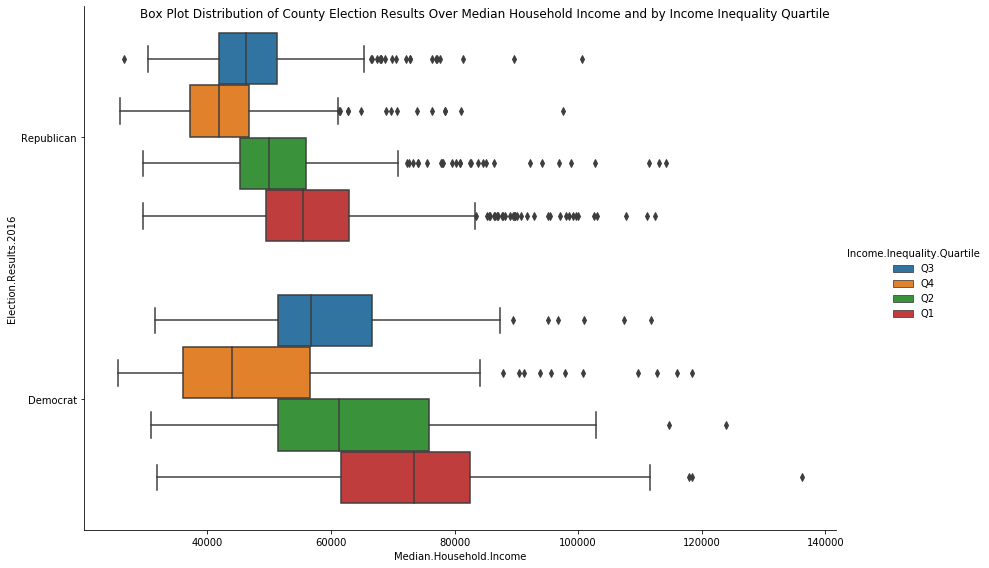

In [7]:
b1 = sns.catplot(x = "Median.Household.Income", y = "Election.Results.2016", hue = "Income.Inequality.Quartile", kind = "box", data = county_data, height = 8, aspect = 1.5);
b1.fig.suptitle("Box Plot Distribution of County Election Results Over Median Household Income and by Income Inequality Quartile")

Text(0.5, 0.98, 'Bar Chart Distribution of County Election Results Over Median Household Income and by Income Inequality Quartile')

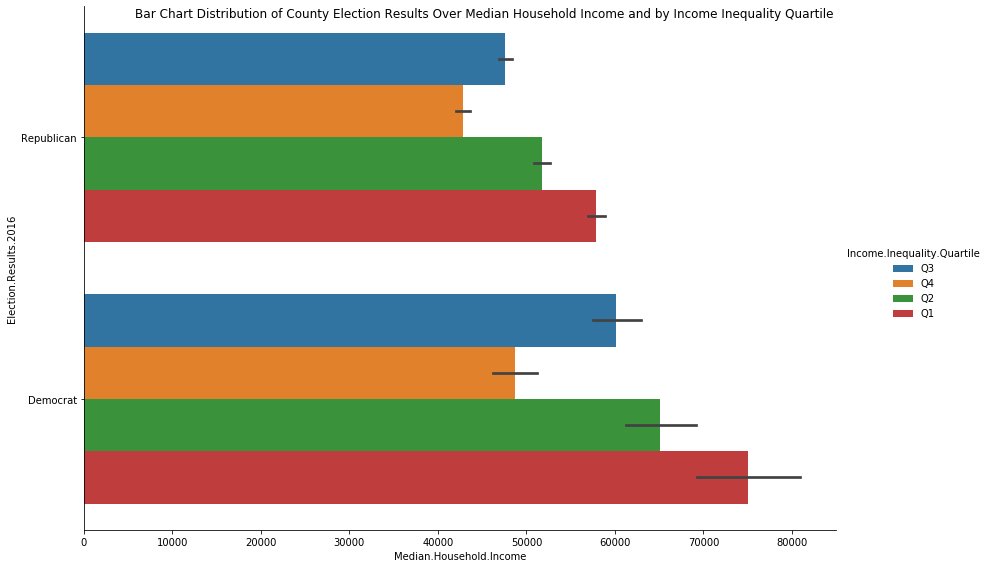

In [8]:
b2 = sns.catplot(x = "Median.Household.Income", y = "Election.Results.2016", hue = "Income.Inequality.Quartile", kind = "bar", data = county_data, height = 8, aspect = 1.5)
b2.fig.suptitle("Bar Chart Distribution of County Election Results Over Median Household Income and by Income Inequality Quartile")

# Box Plot and Bar Chart Distributions for Food Insecurity

The below box plot and bar chart constructed measure the distribution of county Democrat/Republican election results in 2016 (categorical y-variable) over median household income (continuous x-variable) and separated by food insecurity quintiles.

Observe that in both the box plot and bar chart constructed below, counties in highest quintile (Q1 or top 20%) for food insecurity (meaning that they have the most food security) have the highest median household income out of all of the food insecurity quintiles for both Democrat-voting counties and Republican-voting counties.

Additionally, observe that in both the box plot and bar chart constructed below, counties in lowest quintile (Q5 or bottom 20%) for food insecurity (meaning that they have the least food security) have the lowest median household income out of all of the food insecurity quintiles for both Democrat-voting counties and Republican-voting counties.

Text(0.5, 0.98, 'Box Plot Distribution of County Election Results Over Median Household Income and by Food Insecurity Quintile')

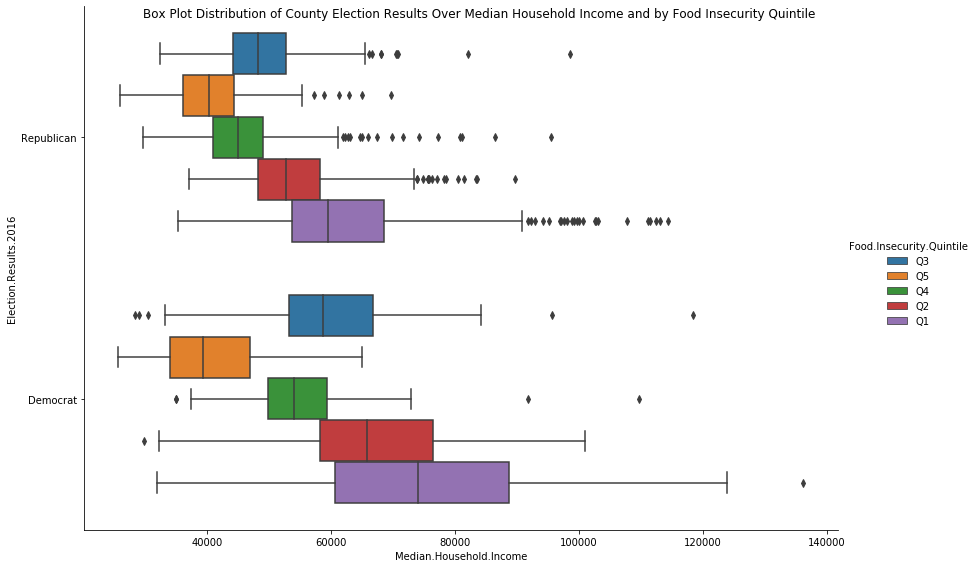

In [9]:
c1 = sns.catplot(x = "Median.Household.Income", y = "Election.Results.2016", hue = "Food.Insecurity.Quintile", kind = "box", data = county_data, height = 8, aspect = 1.5);
c1.fig.suptitle("Box Plot Distribution of County Election Results Over Median Household Income and by Food Insecurity Quintile")

Text(0.5, 0.98, 'Box Plot Distribution of County Election Results Over Median Household Income and by Food Insecurity Quintile')

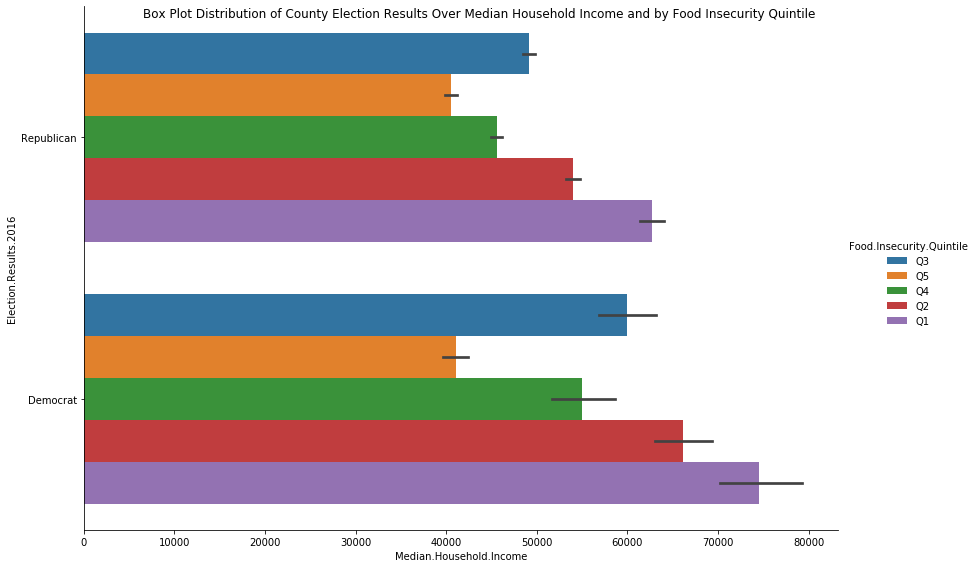

In [10]:
c1 = sns.catplot(x = "Median.Household.Income", y = "Election.Results.2016", hue = "Food.Insecurity.Quintile", kind = "bar", data = county_data, height = 8, aspect = 1.5);
c1.fig.suptitle("Box Plot Distribution of County Election Results Over Median Household Income and by Food Insecurity Quintile")

# Scatterplots of Severe Housing Problems and High School Graduation Rate

## Simple Regression of Rate of Severe Housing Problems vs. High School Graduation Rate

From the scatterplot, we can observe that there is a weak, negative correlation between counties' rate of severe housing problems and their high school graduation rate across the United States, with a cluster of values between high school graduation rates of 0.7 and 1.0, and some outliers to the left of that cluster.

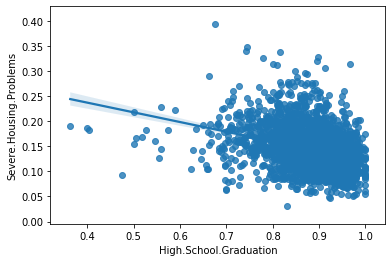

In [11]:
# Simple regression of Rate of Severe Housing Problems vs. High School Graduation Rate using Seaborn's regplot
sns.regplot(x = "High.School.Graduation", y = "Severe.Housing.Problems", data = county_data)

## Color-Coded Scatterplot of Rate of Severe Housing Problems vs. High School Graduation Rate

From the scatterplot, we can observe that clusters of Democrat counties (designated as orange) can be found at higher rates of severe housing problems than clusters of Republican counties (designated as blue).

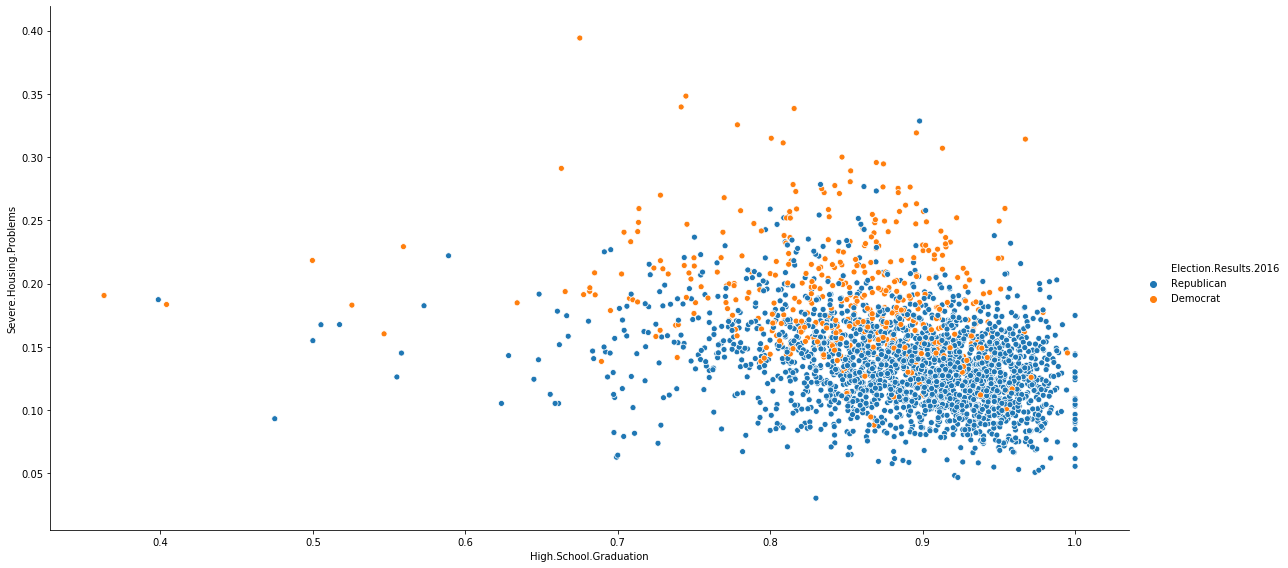

In [12]:
# Color-coded scatterplot of Rate of Severe Housing Problems vs. High School Graduation Rate using a hue based on Election Results in 2016 and Seaborn's relplot
sns.relplot(x = "High.School.Graduation", y = "Severe.Housing.Problems", hue = "Election.Results.2016", data = county_data, height = 8, aspect = 2)

## Simple Regression on Color-Coded Scatterplot of Rate of Severe Housing Problems vs. High School Graduation Rate

From the scatterplot, we can observe that clusters of Democrat counties (designated as orange dots) can be found at higher rates of severe housing problems than clusters of Republican counties (designated as blue "x" marks). Additionally, there is a very weak, negative correlation between the rate of severe housing problems and high school graduation rate for Democrat counties, while there is a relatively stronger but still weak, negative correlation between the rate of severe housing problems and high school graduation rate for Republican counties. Both Democrat and Republican counties have outliers to the left of their respective clusters within the data.

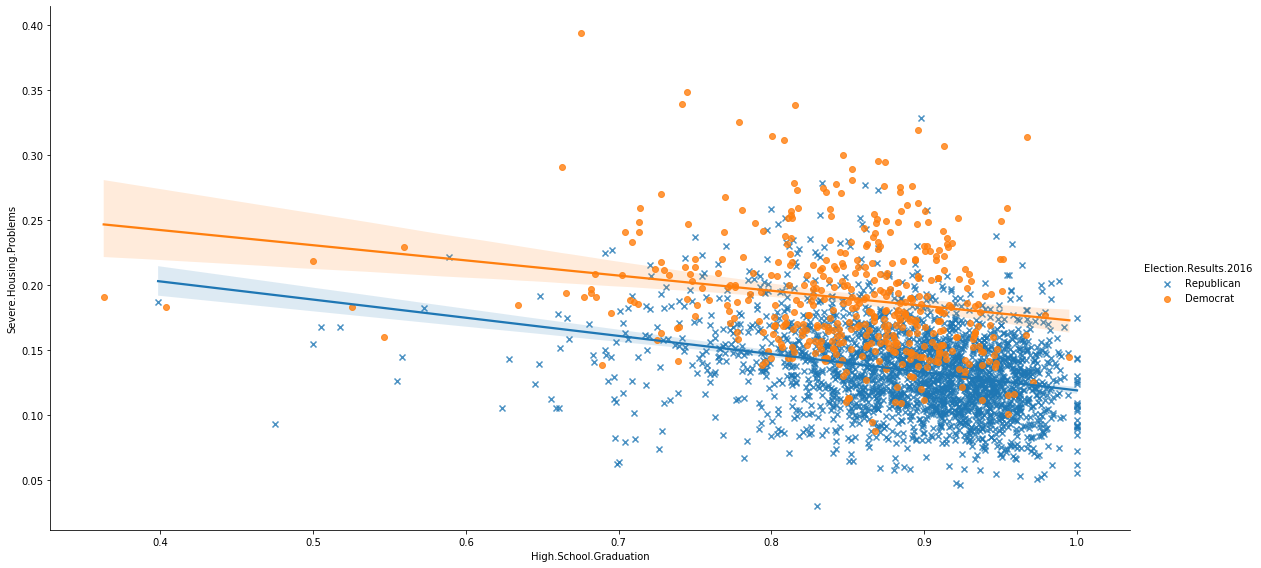

In [13]:
# Simple regression on color-coded scatterplot of Rate of Severe Housing Problems vs. High School Graduation Rate using a hue based on Election Results in 2016 and Seaborn's lmplot
sns.lmplot(x = "High.School.Graduation", y = "Severe.Housing.Problems", hue = "Election.Results.2016", data = county_data, markers = ["x", "o"], height = 8, aspect = 2)

## Fitting Simple Regression Model

Observations:

 - The R-squared value, 0.240, means that approximately 24.0% of the data fits the simple regression model.
 - The x-variable "Over.65" is an important predictor of y-variable "Percent.Rural" because it is statistically significant (since the p-value is less than 0.05).
 - Using a 95% confidence interval with the new data frame ("Xnew") values for prediction, the margin of error would be approximately +/-0.530977.

In [14]:
ols1 = smf.ols(formula = "Q('Percent.Rural') ~ Q('Over.65')", data = county_data)
olsres1 = ols1.fit()
print(olsres1.summary())

# Creating new data frame for prediction
Xnew = {"Over.65": [0.15, 0.2]}
print(olsres1.predict(Xnew))
math.sqrt(olsres1.mse_resid)

# 95% confidence interval for margin of error predictions
print("+/-" + str(2 * (math.sqrt(olsres1.mse_resid))))

                            OLS Regression Results                            
Dep. Variable:     Q('Percent.Rural')   R-squared:                       0.240
Model:                            OLS   Adj. R-squared:                  0.240
Method:                 Least Squares   F-statistic:                     858.0
Date:                Fri, 14 Aug 2020   Prob (F-statistic):          4.13e-164
Time:                        10:15:34   Log-Likelihood:                -250.83
No. Observations:                2715   AIC:                             505.7
Df Residuals:                    2713   BIC:                             517.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.0779      0.022     -3.572   

## Fitting Parallel Lines Regression Model

Observations:

 - The R-squared value, 0.302, means that approximately 30.2% of the data fits the parallel lines regression model.
 - There exists statistical significance in this process because the p-value is less than 0.05.

In [15]:
print(pd.get_dummies(data = county_data["Election.Results.2016"]))

      Democrat  Republican
0            0           1
1            0           1
2            0           1
3            0           1
4            0           1
...        ...         ...
2710         0           1
2711         0           1
2712         0           1
2713         0           1
2714         0           1

[2715 rows x 2 columns]


In [16]:
ols2 = smf.ols(formula = "Q('Percent.Rural') ~ Q('Over.65') + Q('Election.Results.2016')", data = county_data)
olsres2 = ols2.fit()
print(olsres2.summary())

                            OLS Regression Results                            
Dep. Variable:     Q('Percent.Rural')   R-squared:                       0.302
Model:                            OLS   Adj. R-squared:                  0.302
Method:                 Least Squares   F-statistic:                     587.1
Date:                Fri, 14 Aug 2020   Prob (F-statistic):          1.40e-212
Time:                        10:15:34   Log-Likelihood:                -135.49
No. Observations:                2715   AIC:                             277.0
Df Residuals:                    2712   BIC:                             294.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

## Fitting Interaction Model

Observations:

 - The R-squared value, 1.000, means that approximately 100.0% of the data fits the interaction model.
 - The counties that voted Republican are most sensitive to the proportion of the population over the age of 65 (it has the largest slope).
 - The difference in slopes is statistically significant because the p-value is less than 0.05.

In [17]:
ols3 = smf.ols(formula = "Q('Over.65') ~ Q('Election.Results.2016') + Q('Over.65'):Q('Election.Results.2016')", data = county_data)
olsres3 = ols3.fit()
print(olsres3.summary())

                            OLS Regression Results                            
Dep. Variable:           Q('Over.65')   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 8.678e+31
Date:                Fri, 14 Aug 2020   Prob (F-statistic):               0.00
Time:                        10:15:34   Log-Likelihood:                 95182.
No. Observations:                2715   AIC:                        -1.904e+05
Df Residuals:                    2711   BIC:                        -1.903e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------

# Constructing Mosaic Plot of County Election Results in 2016 by Population

The mosaic plot shows that population brackets consisting of counties with higher populations have a higher proportion of Democrat-voting counties, while population brackets consisting of counties with lower populations have a higher proportion of Republican-voting counties.

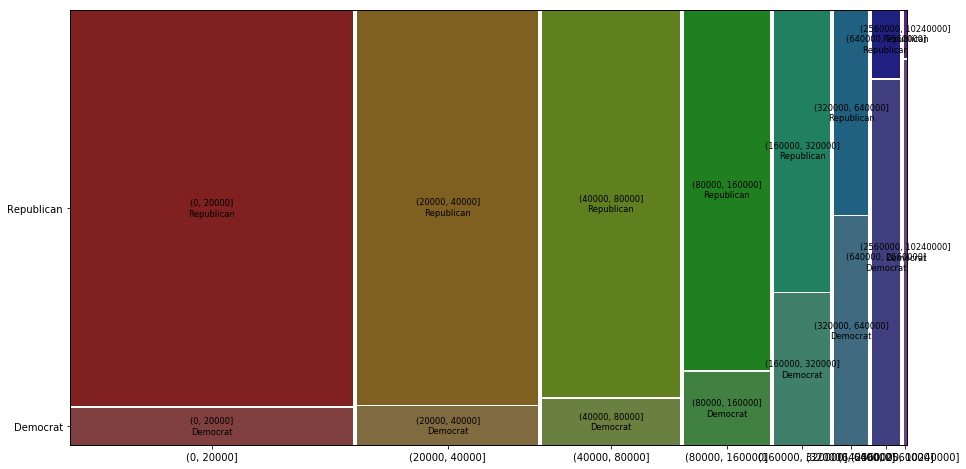

In [18]:
county_data["Population_Bracket"] = pd.cut(county_data["Population"], [0, 20000, 40000, 80000, 160000, 320000, 640000, 2560000, 10240000])
fig, ax1 = plt.subplots(figsize = (15, 8))
mosaic(county_data, ["Population_Bracket", "Election.Results.2016"], ax = ax1);

# Creating a Decision Tree

The following code involves building a decision tree for 2016 Election Results. Variables to be used as potential predictors:

`
[Row.Label, Five-digit.FIPS.Code, State.FIPS.Code, County.FIPS.Code, State.Abbreviation, CountyName, Poor.Health, Uninsured, Primary.Care.Physicians.Per.1000, Mental.health.providers.Per.1000, Adult.Obesity, Proportion.of.Smokers, High.School.Graduation, Insufficient.Sleep, Physical.Inactivity, Excessive.Drinking, Median.Household.Income, Severe.Housing.Problems, Unemployment, Food.Insecurity.Quintile, Income.Inequality.Quartile, Percent.Rural, Over.65,
Percent.Females, Life.Expectancy, Population]
`

Steps taken for creating the decision tree:
 - Created version of data frame with continuous variables ("Xcts") and one with categorical variables ("Xcat").
 - Binarized categorical variables with pandas "pd.get_dummies" function and "drop_first = True" argument.
 - Merged continuous and binarized categorical variables into combined data.
 - Trained and tested data, then created decision tree based on Election Results in 2016 (categorical variable).

In [19]:
Xcts = county_data[["Five-digit.FIPS.Code", "County.FIPS.Code", "Poor.Health", "Uninsured", "Primary.Care.Physicians.Per.1000", "Mental.health.providers.Per.1000", "Adult.Obesity", "Proportion.of.Smokers", "High.School.Graduation", "Insufficient.Sleep", "Physical.Inactivity", "Excessive.Drinking", "Median.Household.Income", "Severe.Housing.Problems", "Unemployment", "Percent.Rural", "Over.65", "Percent.Females", "Life.Expectancy", "Population"]]
Xcat = pd.get_dummies(county_data[["Row.Label", "State.Abbreviation", "CountyName", "Food.Insecurity.Quintile", "Income.Inequality.Quartile"]], drop_first = True)
X = pd.merge(Xcts, Xcat, left_index = True, right_index = True)
print(X.shape)
y = county_data["Election.Results.2016"]
print(X.head(5))

(2715, 4445)
   Five-digit.FIPS.Code  County.FIPS.Code  Poor.Health  Uninsured  \
0                  1001                 1       0.1841     0.0850   
1                  1003                 3       0.1806     0.1070   
2                  1005                 5       0.2577     0.1251   
3                  1007                 7       0.2000     0.0968   
4                  1009                 9       0.2110     0.1211   

   Primary.Care.Physicians.Per.1000  Mental.health.providers.Per.1000  \
0                             0.415                             0.162   
1                             0.729                             0.912   
2                             0.385                             0.079   
3                             0.574                             0.088   
4                             0.225                             0.103   

   Adult.Obesity  Proportion.of.Smokers  High.School.Graduation  \
0          0.375               0.191247                  0.9000   

In [20]:
# Training and testing the data using train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 1)
print(X_train.shape)
print(X_test.shape)

(1357, 4445)
(1358, 4445)


In [21]:
regtree = tree.DecisionTreeClassifier(criterion = "entropy", max_leaf_nodes = 10, random_state = 0)
regtree = regtree.fit(X_train, y_train)
fig = plt.figure(num = None, figsize = (12, 8), dpi = 1000, facecolor = "w", edgecolor = "k")
tree.plot_tree(regtree, filled = True, feature_names = X.columns, proportion = True);

In [22]:
importances = pd.DataFrame({"feature": X_train.columns, "importance": np.round(regtree.feature_importances_, 3)})
importances = importances.sort_values("importance", ascending = False)
print(importances[:7])

                    feature  importance
13  Severe.Housing.Problems       0.625
2               Poor.Health       0.152
19               Population       0.074
17          Percent.Females       0.061
16                  Over.65       0.055
15            Percent.Rural       0.034
0      Five-digit.FIPS.Code       0.000


## Analyzing the Decision Tree

Based on the information gathered from the decision tree and the "variable importance" process, one can conclude that the most important predictor (x) variable for determining whether a county would vote Democrat or Republican in the 2016 presidential election is the rate of Severe Housing Problems, whose importance or entropy (at 0.625) dwarfed the rest of the potential candidates for predictor (x) variables. It was followed by the rate of Poor Health at an entropy of 0.152 and Population at an entropy of 0.074, with three others close behind and the rest of the potential predictor (x) variables having a relatively minor effect on county election choices.

# Conclusions

In this paper I used computational statistical techniques within the Python programming language to analyze the CountyData dataset, which provided 27 predictor variables for each county in the United States. I implemented data visualization and statistical modeling techniques from the importation of the NumPy, SciKit-Learn, Matplotlib, Seaborn, and Statsmodels data science and machine learning libraries/packages, and observed that the socioeconomic factors that were the greatest predictors of counties voting either Democrat or Republican in the 2016 presidential election are the rate of Severe Housing Problems, followed far behind by the rate of Poor Health. I suggest that the two issues Democrats and Republicans focus on the most for 2020 and beyond (in order to win the presidential election, at least) would be residential infrastructure and healthcare, which are already very dominant within candidates' policy proposals and are consistent with many individuals' assumptions about which issues are most associated/decisive when it concerns voting for either Democrat or Republican in a presidential election. Additionally, I found statistically significant differences between three predictor variables (unemployment, median household income, and high school graduation rate) and election results by county in 2016, and observe through the creation of a mosaic plot that population brackets consisting of counties with higher populations have a higher proportion of Democrat-voting counties, while population brackets consisting of counties with lower populations have a higher proportion of Republican-voting counties, which was modeled through a mosaic plot. I constructed three 3-variable scatterplots (two continuous - rate of severe housing problems and high school graduation rate, 1 categorical - Democrat/Republican election results in 2016) and find a weak, negative correlation between the two continuous variables in all three plots, as well as identified clusters and patterns regarding the categorical variable. I used this three-variable method for my boxplots and bar graphs for identifying quartiles of income inequality and quintiles of food insecurity as they concerned the relationship between Democrat/Republican election results in 2016 and median household income. Furthermore, I created three models demonstrating the statistically significant association between the percentage of the county that is rural, the percentage that is over the age of 65, and the county's outcome in the 2016 presidential election. Lastly, I proved that based on the information gathered from the decision tree and the "variable importance" process, one can conclude that the most important predictor (x) variable for determining whether a county would vote Democrat or Republican in the 2016 presidential election is the rate of Severe Housing Problems, whose entropy dwarfs the rest of the potential candidates for predictor (x) variables. It is followed by the rate of Poor Health and Population at much smaller entropy values, with three others close behind and the rest of the potential predictor (x) variables having a relatively minor effect on county election choices.